# Automation of Loan Eligibility process with deep machine learning

## Problem Statement

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.


## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('train_loan_prediction.csv')
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
from pandas_profiling import ProfileReport

In [4]:
 ProfileReport(df, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.isnull().sum().sum()

149

In [9]:
print(f"there is {df.isnull().sum().sum()} null vallues in the dataset.")

there is 149 null vallues in the dataset.


In [10]:
#let's drop the first column of the data
df = df.drop('Loan_ID', axis =1)

In [11]:
df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

# Data cleaning

### Gender

In [12]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [13]:
df.Gender = df.Gender.fillna('male')

In [14]:
df.Gender = df.Gender.replace({'male':'Male'})

### Married

In [15]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [16]:
df['Married'] = df['Married'].fillna('Yes')

### Dependents

In [17]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
df['Dependents'] = df['Dependents'].fillna(0)

### Self-employed

In [19]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
df['Self_Employed'] = df['Self_Employed'].fillna('No')

### Loan Amount

In [21]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [22]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

### Loan Amount term

In [23]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360.0)

### Credit History

In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [27]:
#Now let's look at the data
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
print(f"there is {df.isnull().sum().sum()} null vallues in the data")

there is 0 null vallues in the data


In [29]:
df.shape

(614, 12)

# Data Visualization and EDA

In [30]:
from pivottablejs import pivot_ui
pivot_ui(df)

## Univariate Analysis

In [31]:
pd.crosstab(df.Gender, df.Loan_Status, margins = True)

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         155  347  502
All          192  422  614

<AxesSubplot:>

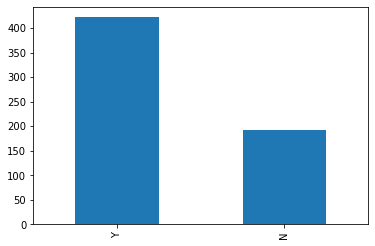

In [32]:
df['Loan_Status'].value_counts().plot.bar()

In [33]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Independent variable (Categorical)

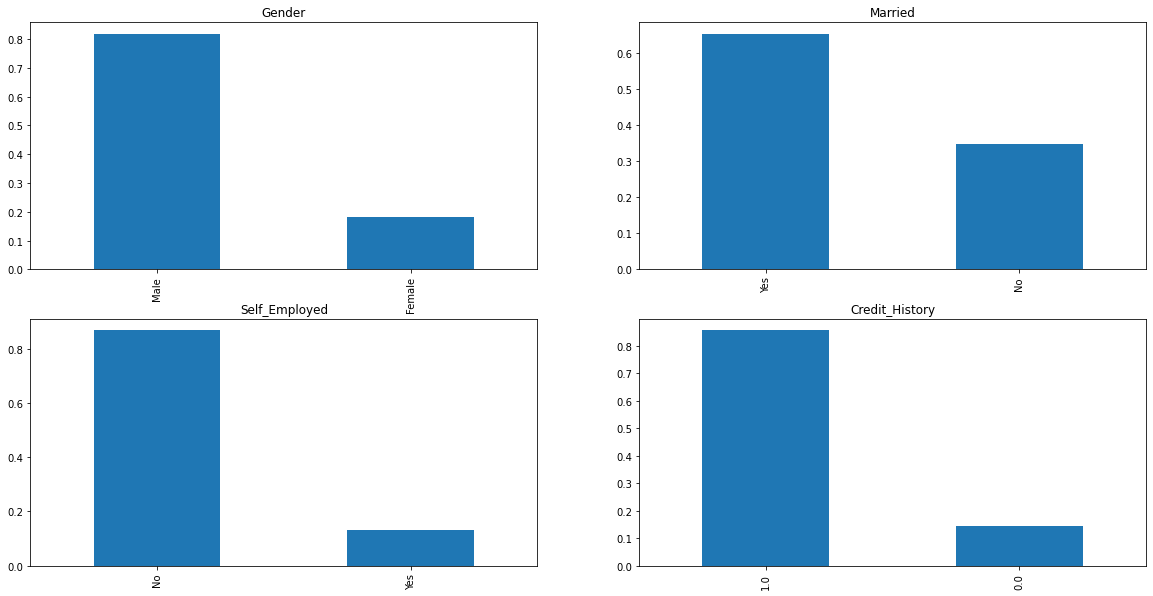

In [34]:
plt.figure(1) 
plt.subplot(221) 
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

80% of the applicants in the data are males.

nearly 65% of the applicants are maried.

about 10% of the applicants are self employed.

and over 85% of applicants have credit history

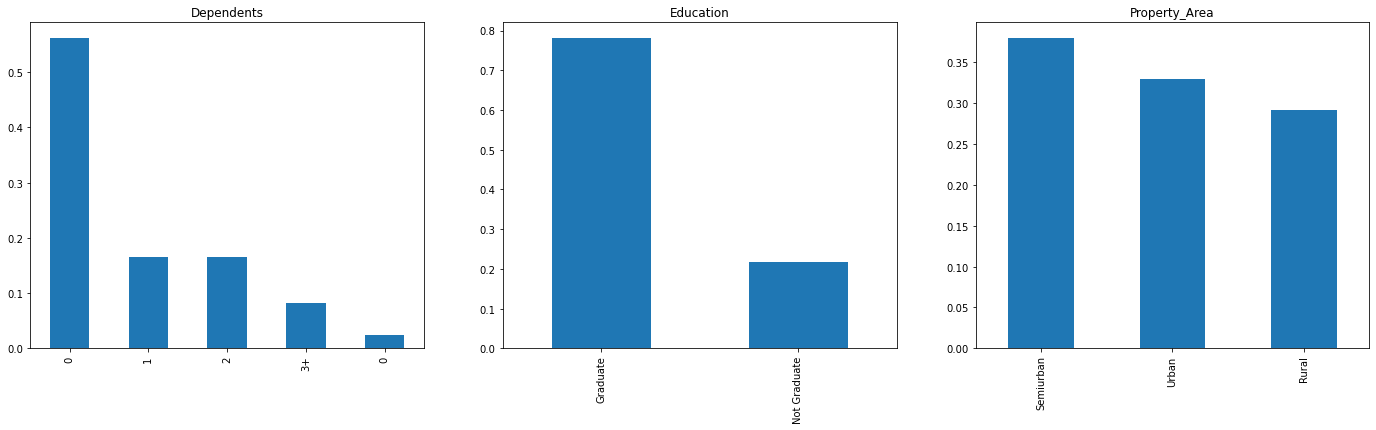

In [35]:
plt.figure(1) 
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents') 
plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Nearly 60% of aplicants don't have dependents.

Nearly 80% of applicants have graduate education.

Almost 40% of applicants live in semi-urban areas, 32% in urban areas, and about 27% in rural areas

### Loan Amount

c:\Users\philippe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


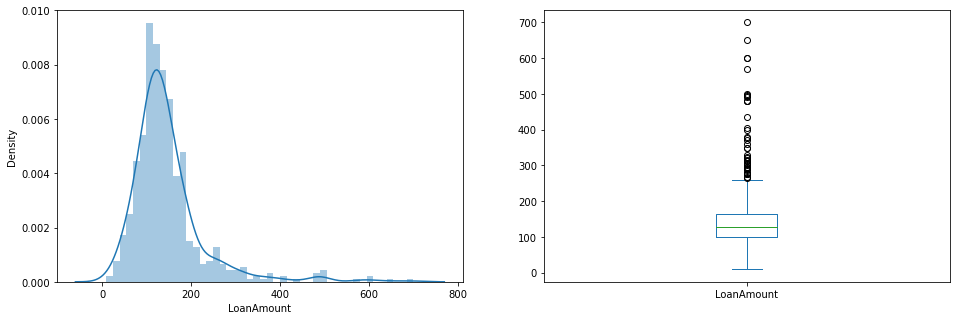

In [36]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount']); 
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

### Applicant income

c:\Users\philippe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


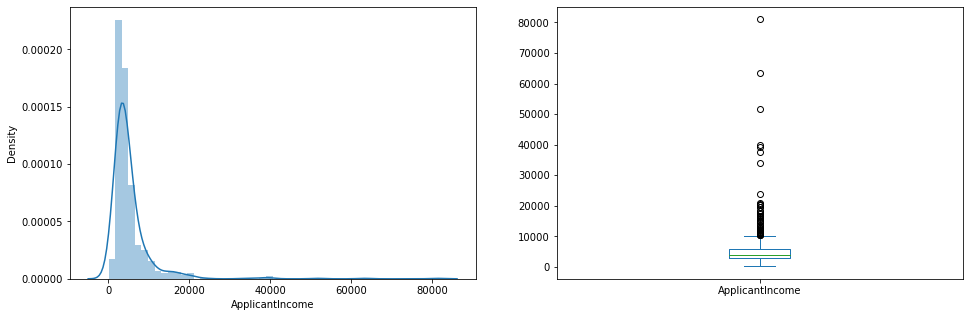

In [37]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(df['ApplicantIncome']); 
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

### Co-applicant income

c:\Users\philippe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


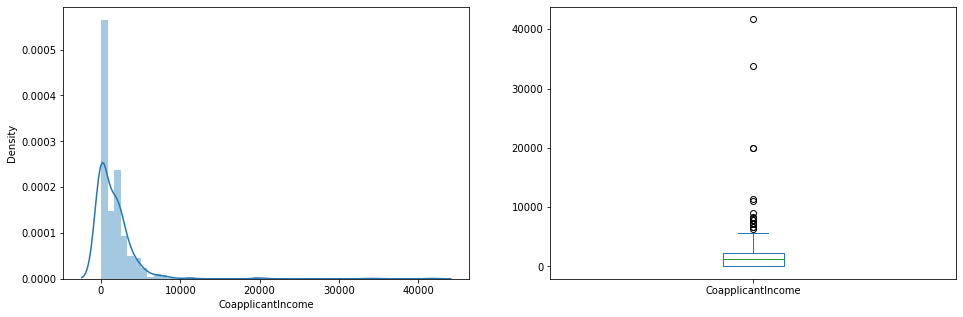

In [38]:
plt.figure(1) 
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']); 
plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

These recent visualizations displays presence of outliers in the following variables:

'Coapplicantincome', 'Applicantincome', and 'LoanAmount'.
    

## Bivariate Analysis

### Gender vs Target variable

<AxesSubplot:xlabel='Gender'>

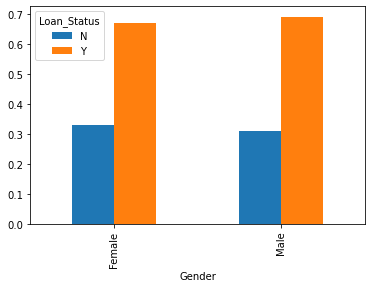

In [39]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(6,4))

### Married, Dependenps, Education, Self-employed

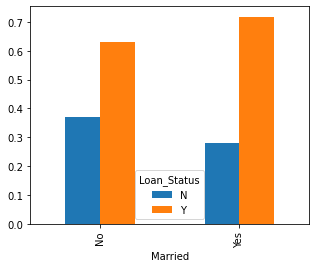

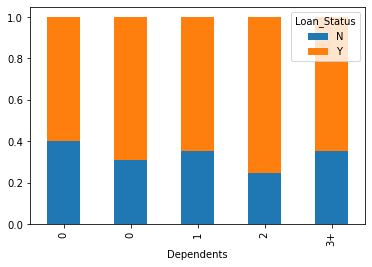

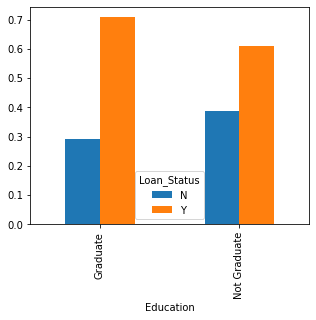

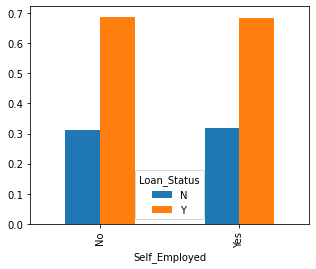

In [40]:
Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status']) 
Education=pd.crosstab(df['Education'],df['Loan_Status']) 
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,4)) 
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,4)) 
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(5,4))
plt.show()
sns.set()

Based on the information above, we can tell that maried applicants 70% chance of being approved.

Non married applicants have over 63% of being approved.

Graduate applicants tend to get approved the most and there is not that much difference between self and

no self-employed when it comes to loan approval because the approval rate is the same in both areas.

# Create Bins on quantiles

## Applicant Income

In [41]:
df.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [274]:
df2 = df.copy()

In [275]:
#create some applicant income bins
bins=[0,2800,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
df2['app_income_bin']=pd.cut(df2['ApplicantIncome'],bins,labels=group)

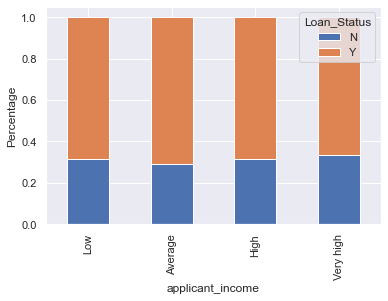

In [285]:
app_income_bin=pd.crosstab(df2['app_income_bin'],df2['Loan_Status']) 
app_income_bin.div(app_income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('applicant_income') 
P = plt.ylabel('Percentage')

## Co-applicant income

In [310]:
#create some co-applicant income bins
bins2=[0,1200,2300,80000]
group2=['Low','Average','High'] 
df2['coapp_income_bin']=pd.cut(df2['CoapplicantIncome'],bins2,labels=group2)

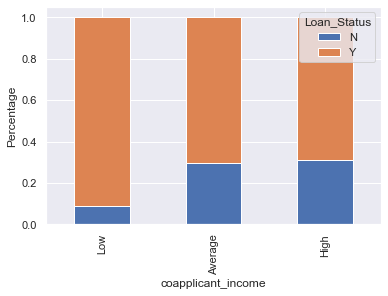

In [311]:
coapp_income_bin=pd.crosstab(df2['coapp_income_bin'],df2['Loan_Status']) 
coapp_income_bin.div(coapp_income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('coapplicant_income') 
P = plt.ylabel('Percentage')

## Loan amount

In [312]:
#create some loan amount bins
bins=[0,100,130,700]
group=['Low','Average','High'] 
df2['loan_amount_bin']=pd.cut(df2['LoanAmount'],bins,labels=group)

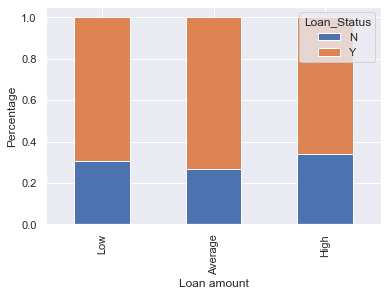

In [313]:
loan_amount_bin=pd.crosstab(df2['loan_amount_bin'],df2['Loan_Status']) 
loan_amount_bin.div(loan_amount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Loan amount') 
P = plt.ylabel('Percentage')

In [314]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [315]:
df2.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
app_income_bin         0
coapp_income_bin     273
loan_amount_bin        0
dtype: int64

In [49]:
df2.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [50]:
df2.describe().T.style.background_gradient(cmap = "viridis")

In [316]:
df2['Total income']= df2['ApplicantIncome'] + df2['CoapplicantIncome']

In [317]:
df2.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status app_income_bin coapp_income_bin loan_amount_bin  \
0         Urban           Y           High              NaN            High   
1         Rural           N           High          Average         Average   
2         Urban           Y        Average              NaN             Low   
3         Urban           Y            Low             High         Average   
4         Urban           Y           High              NaN            High   

   Total income  
0        5849.0  
1        6091.0  
2        3000.0  
3        4941.0  
4        6000.0

In [318]:
df2.to_csv('loan_bin.csv')

### Credit History and Property Area

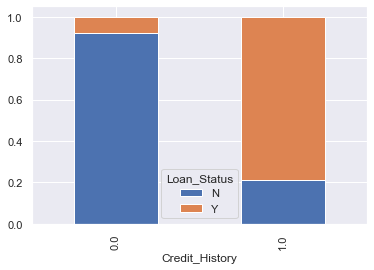

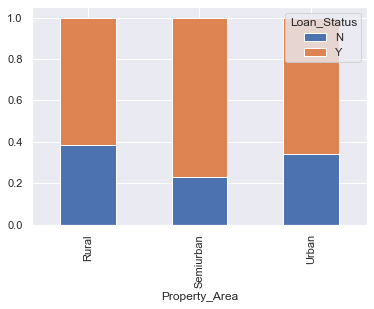

In [51]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status']) 
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

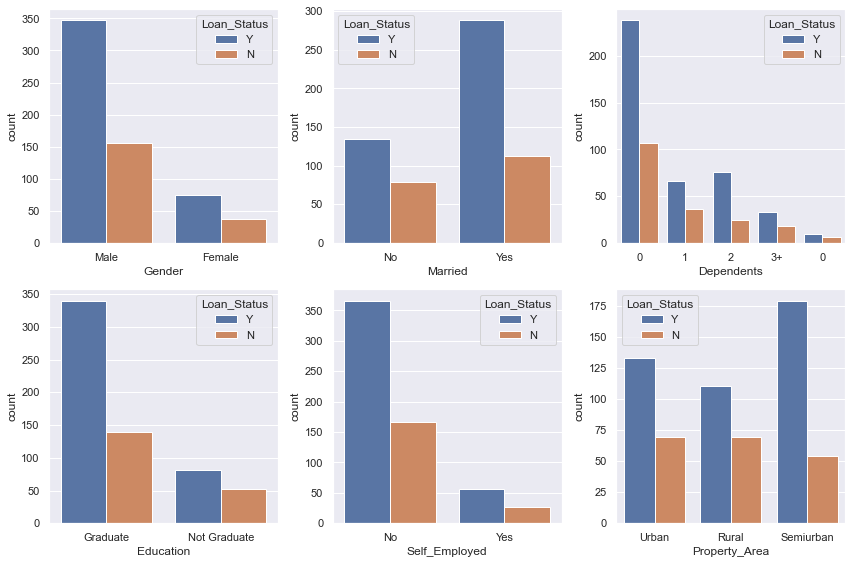

In [52]:
countplot_list = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
plt.figure(figsize=(12,8))
x=1
for i in countplot_list:
    plt.subplot(2,3,x)
    sns.countplot(x=i,hue='Loan_Status',data=df2)
    x = x + 1
plt.tight_layout()

### pie plot for the dependents

In [53]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

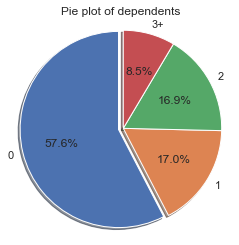

In [54]:
plt.figure(figsize=(4,4))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie plot of dependents')
plt.show()

In [55]:
df.groupby('Loan_Status')['Credit_History'].sum()

Loan_Status
N    110.0
Y    415.0
Name: Credit_History, dtype: float64

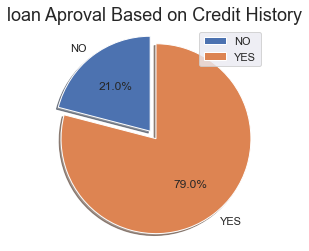

In [56]:
plt.figure(figsize=(4,4))
labels = ['NO' , 'YES']
explode = (0, 0.1)
size = [110 , 415]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('loan Aproval Based on Credit History', size = 18)
plt.legend(labels, loc="best")
plt.show()

## remove outliers

In [57]:
#define a function called "outliers" which returns a list of index of outliers
#IQR = Q3 - Q1
# +/- 1.5*IQR

def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    
    ls = df.index[ (df[col] < lower) | (df[col] > upper)]
    
    return ls

In [58]:
#create an empty list to store the output indices from multiple columns

index_list = []

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ]:
    index_list.extend(outliers(df, col))

In [59]:
# Define a function called "remove" which returns a cleaned dataframe without outliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [60]:
data = remove(df, index_list)

In [61]:
df.shape

(614, 15)

In [62]:
data.shape

(535, 15)

In [63]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status app_income_bin coapp_income_bin loan_amount_bin  
0         Urban           Y           High              NaN            High  
1         Rural           N           High          Average         Average  
2         Urban           Y        Average              NaN             Low  
3         Urban           Y            Low             High         Average  
4         Urban           Y           High              NaN            High

In [64]:
data.to_csv('Final_loan_preddata.csv', index = False)

In [65]:
data = data.drop('app_income_bin', axis = 1)
data = data.drop('coapp_income_bin', axis =1)
data = data.drop('loan_amount_bin', axis = 1)

In [66]:
data.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [67]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label encoding

In [68]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [69]:
cols =['Gender','Married','Education','Self_Employed', 'Property_Area','Loan_Status']

In [70]:
# Trasform other categories 
for i in cols:
    data[i]=le.fit_transform(data[i])

In [71]:
data.head()

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0          0          0              0             5849   
1       1        1          1          0              0             4583   
2       1        1          0          0              1             3000   
3       1        1          0          1              0             2583   
4       1        0          0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              2            1  
1              0            0  
2              2            1  
3              2            1  
4              2            1

In [72]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             535 non-null    int32  
 1   Married            535 non-null    int32  
 2   Dependents         521 non-null    float64
 3   Education          535 non-null    int32  
 4   Self_Employed      535 non-null    int32  
 5   ApplicantIncome    535 non-null    int64  
 6   CoapplicantIncome  535 non-null    float64
 7   LoanAmount         535 non-null    float64
 8   Loan_Amount_Term   535 non-null    float64
 9   Credit_History     535 non-null    float64
 10  Property_Area      535 non-null    int32  
 11  Loan_Status        535 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 41.8 KB


In [75]:
data['Dependents'].value_counts()

0.0    307
2.0     90
1.0     84
3.0     40
Name: Dependents, dtype: int64

In [76]:
data['Dependents'] = data['Dependents'].fillna(0)

In [77]:
data['Dependents'].value_counts()

0.0    321
2.0     90
1.0     84
3.0     40
Name: Dependents, dtype: int64

In [78]:
data.shape

(535, 12)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             535 non-null    int32  
 1   Married            535 non-null    int32  
 2   Dependents         535 non-null    float64
 3   Education          535 non-null    int32  
 4   Self_Employed      535 non-null    int32  
 5   ApplicantIncome    535 non-null    int64  
 6   CoapplicantIncome  535 non-null    float64
 7   LoanAmount         535 non-null    float64
 8   Loan_Amount_Term   535 non-null    float64
 9   Credit_History     535 non-null    float64
 10  Property_Area      535 non-null    int32  
 11  Loan_Status        535 non-null    int32  
dtypes: float64(5), int32(6), int64(1)
memory usage: 41.8 KB


## Correlation Matrix

<AxesSubplot:>

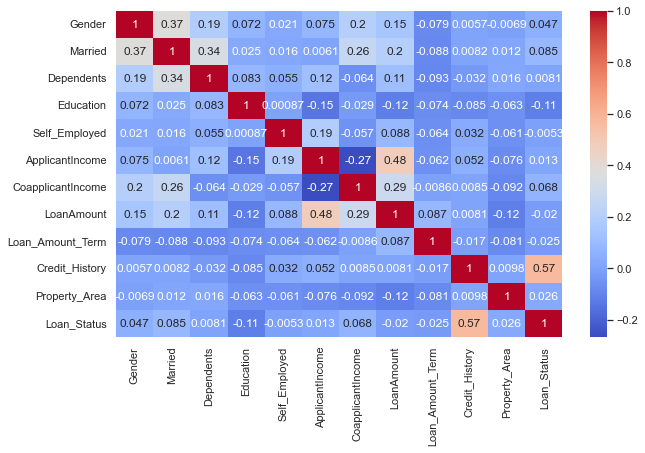

In [80]:
#correlation matrix 
sns.set_style("dark")
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

## Data preprocessing

In [81]:
X = data.iloc[:,0:11].values
y = data.iloc[:,11].values.ravel()

In [82]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [83]:
data.isnull().sum().sum()

0

In [84]:
# Feature Scaling
from sklearn import preprocessing
X_test = preprocessing.scale(X_test)
X_train = preprocessing.scale(X_train)
Xtest = preprocessing.scale(Xtest)
Xtrain = preprocessing.scale(Xtrain)
x = preprocessing.scale(X)

# classification algorithm

## Logistic regression

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
model_reg = LogisticRegression(random_state=0)
model_reg= model_reg.fit(X_train, y_train)

In [86]:
# Predicting the Test set results
y_pred_reg = model_reg.predict(X_test)
y_pred_reg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [87]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred_reg, y_test))

The accuracy of Logistic Regression is:  0.794392523364486


In [88]:
#accuracy with validation
log_acc = cross_val_score(model_reg, X_test, y_test, scoring ='accuracy', cv = 5).mean()
log_acc

0.7471861471861472

In [89]:
log_acc = cross_val_score(model_reg, X_train, y_train, scoring ='accuracy', cv = 5).mean()
log_acc

0.8294117647058824

### plot roc curve

In [90]:
#define metrics
y_pred_reg = model_reg.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_reg)
roc_auc1 = metrics.roc_auc_score(y_test, y_pred_reg)

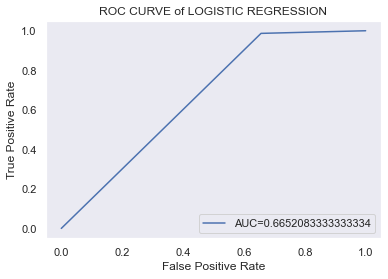

In [91]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(roc_auc1))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC CURVE of LOGISTIC REGRESSION')
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
roc_au1 = roc_auc_score(y_test, y_pred_reg)

In [93]:
roc_au1

0.6652083333333334

In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred_reg, labels =model_reg.classes_ )
cm1

array([[11, 21],
       [ 1, 74]], dtype=int64)

In [95]:
disp = ConfusionMatrixDisplay( confusion_matrix =cm1)

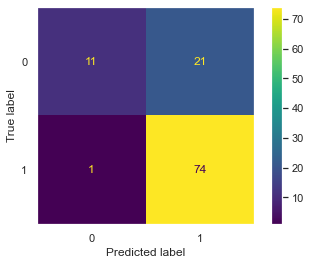

In [96]:
disp.plot()
plt.show()
sns.set()

In [97]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Logistic Regression :")
print(" accuracy is ",accuracy_score(y_test,y_pred_reg))
print(" precision score is ",precision_score(y_test,y_pred_reg))
print(" recall is ",recall_score(y_test,y_pred_reg))
print(" f1 score is ",f1_score(y_test,y_pred_reg))                            
print(" classification report is ",classification_report(y_test,y_pred_reg))

Logistic Regression :
 accuracy is  0.794392523364486
 precision score is  0.7789473684210526
 recall is  0.9866666666666667
 f1 score is  0.8705882352941177
 classification report is                precision    recall  f1-score   support

           0       0.92      0.34      0.50        32
           1       0.78      0.99      0.87        75

    accuracy                           0.79       107
   macro avg       0.85      0.67      0.69       107
weighted avg       0.82      0.79      0.76       107



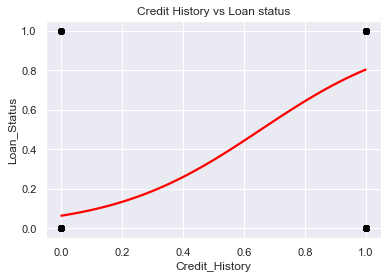

In [98]:
#define the predictor variable and the response variable
import seaborn as sns
xx = data['Credit_History']
yy = data['Loan_Status']

#plot logistic regression curve with black points and red line
sns.regplot(x=xx, y=yy, data=data, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.title('Credit History vs Loan status')
plt.show()

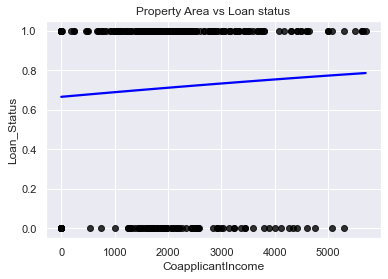

In [99]:
#define the predictor variable and the response variable
import seaborn as sns
xx1 = data['CoapplicantIncome']
yy1 = data['Loan_Status']

#plot logistic regression curve with black points and red line
sns.regplot(x=xx1, y=yy1, data=data, logistic=True, ci=None,
            scatter_kws={'color': 'black'}, line_kws={'color': 'blue'})
plt.title('Property Area vs Loan status')
plt.show()

## Logistic regression with Hyperparameter optimization

In [100]:
#Hyperparameter tuning
# define model/create instance
from sklearn.model_selection import StratifiedKFold
lr=LogisticRegression()
#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)
#specifying all hyperparameters with possible values
param= {'C': [0.1,0.5,1,10], 'penalty': ['l1', 'l2'],"class_weight":[{0:x ,1:1.0 -x} for x in weights]}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 0)
#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,param_grid=param,scoring="accuracy",cv=folds,return_train_score=True)
#train model to learn relationships between x and y
model.fit(X_train,y_train)

c:\Users\philippe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10000 fits failed out of a total of 20000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\philippe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\philippe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\philippe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    r

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 10],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.007935871743486974,
                                           1: 0.992064128256513},
                                          {...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.

In [101]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.8317920656634747
Best hyperparameters:  {'C': 0.1, 'class_weight': {0: 0.5356713426853708, 1: 0.46432865731462925}, 'penalty': 'l2'}


### Build Model using optimal values of Hyperparameters

In [102]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.54,1:0.46},C=0.1,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight={0: 0.54, 1: 0.46})

In [103]:
acc1 = cross_val_score(lr2, X_test, y_test, scoring ='accuracy', cv = 5).mean()
acc1

0.7852813852813852

In [104]:
acc2 = cross_val_score(lr2, X_train, y_train, scoring ='accuracy', cv = 5).mean()
acc2

0.8294117647058824

### Model Evaluation

In [105]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :",cm)

# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is : [[11 21]
 [ 1 74]]
ROC-AUC score  test dataset:  t 0.6683333333333333
precision score  test dataset:  t 0.7789473684210526
Recall score  test dataset:  t 0.9866666666666667
f1 score  test dataset :  t 0.8705882352941177


In [106]:
y_pred1 = lr2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred1)
auc1 = metrics.roc_auc_score(y_test, y_pred1)

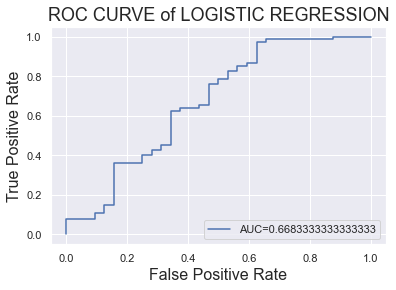

In [107]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc1))
plt.ylabel('True Positive Rate', size = 16)
plt.xlabel('False Positive Rate', size = 16)
plt.legend(loc=4)
plt.title('ROC CURVE of LOGISTIC REGRESSION', size = 18)
plt.show()

In [108]:
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

## average precision score

In [109]:
# Average precision score
from sklearn.metrics import PrecisionRecallDisplay
y_pred1 = lr2.predict_proba(X_test)[:, 1]
average_precision = average_precision_score(y_test, y_pred1)
print(average_precision)

0.795353417700383


In [110]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.7922916738063834


Text(0.5, 1.0, 'Logistic Regression Precision-Recall curve: AP=0.80')

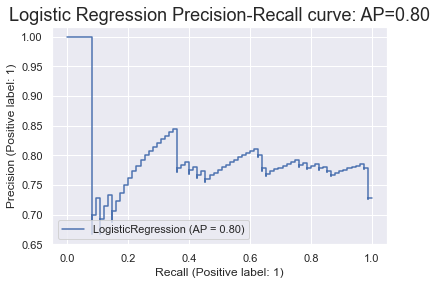

In [111]:
disp1 = PrecisionRecallDisplay.from_estimator(lr2, X_test, y_test)
disp1.ax_.set_title('Logistic Regression Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), size = 18)

[[11 21]
 [ 1 74]]


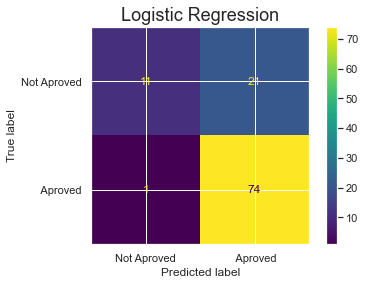

In [112]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_regl = lr2.predict(X_test)
print(confusion_matrix(y_test, y_pred_regl))
con_ma1 = confusion_matrix(y_test, y_pred_regl, labels = lr2.classes_)
disp1 = ConfusionMatrixDisplay( confusion_matrix = con_ma1,
                              display_labels = ["Not Aproved", " Aproved"])
disp1.plot()
plt.title('Logistic Regression', size = 18)
plt.show()
sns.set()

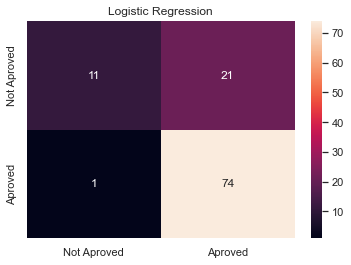

In [113]:
sns.heatmap(con_ma1 , annot=True, fmt='g',yticklabels=["Not Aproved", "Aproved"], xticklabels=["Not Aproved", "Aproved"]);
plt.title('Logistic Regression')
plt.show()

## Feature Importance of Logistic Regression

In [114]:
# The estimated coefficients will all be around 1:
print(lr2.coef_)

[[ 0.02429959  0.20369603  0.10873871 -0.12920116 -0.09699896  0.0197079
   0.09403551 -0.17030927 -0.00366697  1.04072432  0.1030598 ]]


In [115]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [116]:
columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [117]:
columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

In [118]:
feature_importance = dict(zip(columns, lr2.coef_[0]))


In [119]:
feature_importance

{'Gender': 0.024299591669142164,
 'Married': 0.20369603455668997,
 'Dependents': 0.10873870781838965,
 'Education': -0.12920116383049496,
 'Self_Employed': -0.09699895886015716,
 'ApplicantIncome': 0.01970789885111399,
 'CoapplicantIncome': 0.0940355129867549,
 'LoanAmount': -0.17030927216681777,
 'Loan_Amount_Term': -0.00366696840441276,
 'Credit_History': 1.0407243215358528,
 'Property_Area': 0.10305980441395521}

In [120]:
ab = lr2.coef_[0]

In [121]:
ab_list = ab.tolist()

In [122]:
ab_list

[0.024299591669142164,
 0.20369603455668997,
 0.10873870781838965,
 -0.12920116383049496,
 -0.09699895886015716,
 0.01970789885111399,
 0.0940355129867549,
 -0.17030927216681777,
 -0.00366696840441276,
 1.0407243215358528,
 0.10305980441395521]

In [123]:
lol = pd.DataFrame({'feature_names': columns,
                    'feature_importance':ab_list} )

In [124]:
lol

feature_names  feature_importance
0              Gender            0.024300
1             Married            0.203696
2          Dependents            0.108739
3           Education           -0.129201
4       Self_Employed           -0.096999
5     ApplicantIncome            0.019708
6   CoapplicantIncome            0.094036
7          LoanAmount           -0.170309
8    Loan_Amount_Term           -0.003667
9      Credit_History            1.040724
10      Property_Area            0.103060

In [125]:
lol.sort_values(by= ['feature_importance'])

feature_names  feature_importance
7          LoanAmount           -0.170309
3           Education           -0.129201
4       Self_Employed           -0.096999
8    Loan_Amount_Term           -0.003667
5     ApplicantIncome            0.019708
0              Gender            0.024300
6   CoapplicantIncome            0.094036
10      Property_Area            0.103060
2          Dependents            0.108739
1             Married            0.203696
9      Credit_History            1.040724

In [126]:
X_names = columns

In [127]:
names = lol['feature_names']
importance= lol['feature_importance']

In [128]:
feature_imp1 = pd.Series(ab_list, index=X_names).sort_values(ascending=False)
feature_imp1

Credit_History       1.040724
Married              0.203696
Dependents           0.108739
Property_Area        0.103060
CoapplicantIncome    0.094036
Gender               0.024300
ApplicantIncome      0.019708
Loan_Amount_Term    -0.003667
Self_Employed       -0.096999
Education           -0.129201
LoanAmount          -0.170309
dtype: float64

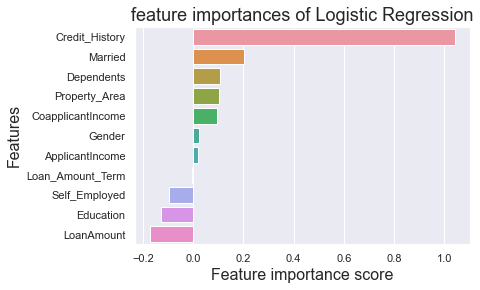

In [129]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=feature_imp1, y=feature_imp1.index)
ax.set_title("feature importances of Logistic Regression", size = 18)
ax.set_yticklabels(feature_imp1.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

from the feature importances plot, we can tell that the features that influenced the the model results the most

are credit history with a coefficient of 1.04 , status marital of applicant, their dependents, property area, and 

the coapplicant income in that order.

In [130]:
from sklearn.metrics import mean_squared_error
ts_error_gbr_1 = round(mean_squared_error(y_test,y_pred_test),2)
print("Testing error is:",ts_error_gbr_1)

Testing error is: 0.21


In [131]:
lr2.intercept_

array([0.75128014])

## Odds Ratio

In [132]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as glm
import numpy as np

In [133]:
x4 = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']].values
y1=data[['Loan_Status']].values

In [134]:
# Feature Scaling
from sklearn import preprocessing
x4 = preprocessing.scale(x4)

In [135]:
x_x4 = sm.add_constant(x4)
reg3 = sm.Logit(y1,x_x4)
results3 = reg3.fit()

Optimization terminated successfully.
         Current function value: 0.444840
         Iterations 7


In [136]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  535
Model:                          Logit   Df Residuals:                      523
Method:                           MLE   Df Model:                           11
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.2764
Time:                        18:17:04   Log-Likelihood:                -237.99
converged:                       True   LL-Null:                       -328.90
Covariance Type:            nonrobust   LLR p-value:                 4.301e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8488      0.124      6.835      0.000       0.605       1.092
x1             0.0494      0.122      0.406      0.685      -0.189       0.288
x2             0.2133      0.133      1.603      0.109      -0.047       0.474
x3             0.0652      0.131      0.497      0.619      -0.192       0.323
x4            -0.2301      0.116     -1.980      0.048      -0.458      -0.002
x5            -0.0576      0.113     -0.508      0.612      -0.280       0.165
x6             0.1335      0.160      0.837      0.403      -0.179       0.446
x7             0.2568      0.154      1.673      0.094      -0.044       0.558
x8            -0.2991      0.158     -1.888      0.059      -0.609       0.011
x9            -0.0142      0.123     -0.115      0.908      -0.254       0.226
x10            1.4635      0.171      8.579      0.000       1.129       1.798
x11            0.0328      0.119      0.274      0.784      -0.201       0.267
==============================================================================
"""

In [137]:
model_odds = pd.DataFrame(np.exp(results3.params), columns= ['OR'])
model_odds['z-value']= results3.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(results3.conf_int())
model_odds

OR       z-value      2.5%     97.5%
0   2.336810  8.217122e-12  1.831954  2.980795
1   1.050624  6.846032e-01  0.827863  1.333326
2   1.237817  1.088367e-01  0.953670  1.606625
3   1.067407  6.194604e-01  0.825128  1.380825
4   0.794431  4.768794e-02  0.632603  0.997658
5   0.944062  6.117394e-01  0.755911  1.179045
6   1.142816  4.027377e-01  0.835938  1.562352
7   1.292810  9.441679e-02  0.956827  1.746771
8   0.741514  5.896962e-02  0.543649  1.011395
9   0.985943  9.080500e-01  0.775390  1.253671
10  4.320951  9.577480e-18  3.092950  6.036506
11  1.033314  7.838158e-01  0.817627  1.305900

# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [139]:
from sklearn import tree

In [140]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state= 0, max_depth = 4)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

[Text(0.4625, 0.9, 'X[9] <= -0.957\nentropy = 0.889\nsamples = 428\nvalue = [131, 297]'),
 Text(0.25, 0.7, 'X[5] <= 0.158\nentropy = 0.33\nsamples = 66\nvalue = [62, 4]'),
 Text(0.15, 0.5, 'X[8] <= -1.63\nentropy = 0.144\nsamples = 49\nvalue = [48, 1]'),
 Text(0.1, 0.3, 'X[5] <= -0.793\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.05, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.2, 0.3, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(0.35, 0.5, 'X[5] <= 0.49\nentropy = 0.672\nsamples = 17\nvalue = [14, 3]'),
 Text(0.3, 0.3, 'X[5] <= 0.437\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.25, 0.1, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.35, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.675, 0.7, 'X[1] <= -0.335\nentropy = 0.703\nsamples = 362\nvalue = [69, 293]'),
 Text(0.55, 0.5, 'X[8] <= 1.

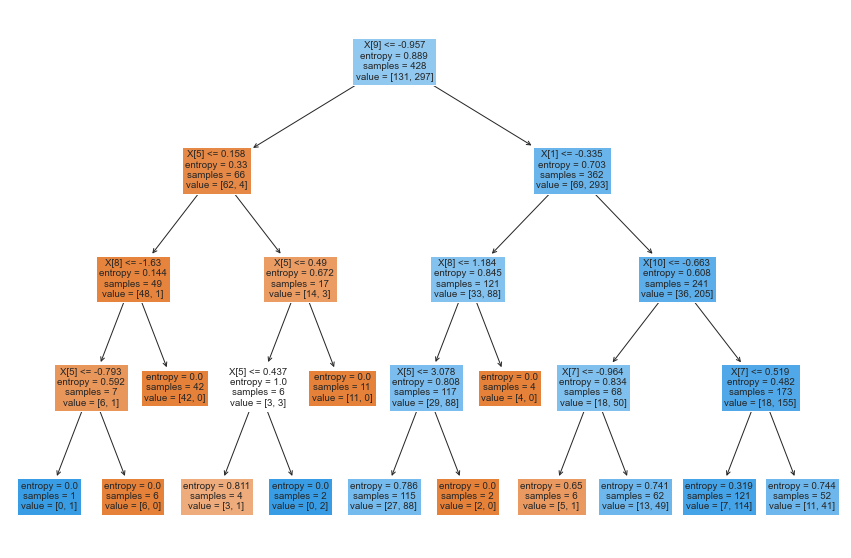

In [141]:
plt.figure(figsize =(15,10))
tree.plot_tree(dtree, filled =True)

In [142]:
dtree_test_accuracy = cross_val_score(dtree, X_test,y_test, scoring='accuracy', cv = 5).mean()
dtree_test_accuracy

0.7190476190476189

# hyperparameter tuning of Decission tree

## Build Model using optimal values of Hyperparameters

In [143]:
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [144]:
ccp_alphas

array([0.        , 0.00643665, 0.00822732, 0.00958372, 0.0101954 ,
       0.01411626, 0.0155984 , 0.2433518 ])

In [145]:
dtrees= []
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
    dtree.fit(X_train, y_train)
    dtrees.append(dtree)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: ccp_alpha: {}".format(
    dtrees[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: ccp_alpha: 0.24335180421980807


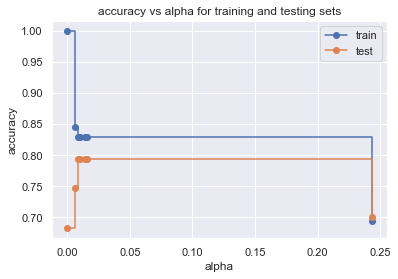

In [146]:
train_scores= [dtree.score(X_train, y_train) for dtree in dtrees]
test_scores = [dtree.score(X_test, y_test) for dtree in dtrees]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker ='o', label='train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

## Model Evaluation

In [147]:
dtree2 = DecisionTreeClassifier( random_state= 0, ccp_alpha = 0.02)
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.02, random_state=0)

In [261]:
dtree2_test_accuracy = cross_val_score(dtree2, X_test,y_test, scoring='accuracy', cv = 10).mean()
dtree2_test_accuracy

0.8118181818181818

In [259]:
tree2_train_accuracy = cross_val_score(dtree2,X_train,y_train, scoring ='accuracy', cv =5).mean()
tree2_train_accuracy

0.8294117647058824

### roc auc Curve

In [149]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test2 = dtree2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test2 = dtree2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test2)
print("confusion Matrix is :",cm)

# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test2))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test2))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test2))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test2))


confusion Matrix is : [[11 21]
 [ 1 74]]
ROC-AUC score  test dataset:  t 0.6652083333333334
precision score  test dataset:  t 0.7789473684210526
Recall score  test dataset:  t 0.9866666666666667
f1 score  test dataset :  t 0.8705882352941177


## Confusion matrix

[[11 21]
 [ 1 74]]


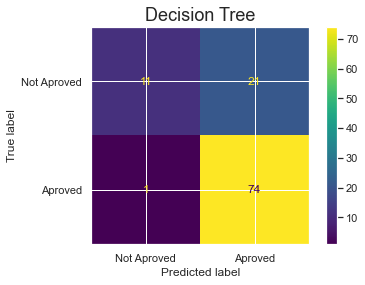

In [150]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_test2 = dtree2.predict(X_test)
print(confusion_matrix(y_test, y_pred_test2))
con_ma2 = confusion_matrix(y_test, y_pred_test2, labels = dtree2.classes_)
disp2 = ConfusionMatrixDisplay( confusion_matrix = con_ma1,
                              display_labels = ["Not Aproved", "Aproved"])
disp2.plot()
plt.title('Decision Tree', size = 18)
plt.show()
sns.set()

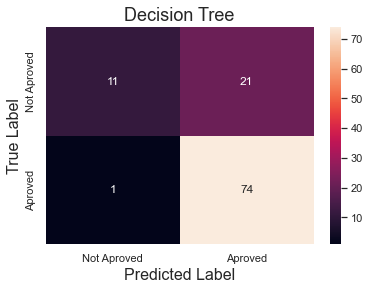

In [151]:
sns.heatmap(con_ma2 , annot=True, fmt='g',yticklabels=["Not Aproved", "Aproved"],
            xticklabels=["Not Aproved", "Aproved"]);
plt.title('Decision Tree', size = 18)
plt.xlabel('Predicted Label', size = 16)
plt.ylabel('True Label', size = 16)
plt.show()

In [152]:
y_pred2 = dtree2.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob_test2)
auc2 = metrics.roc_auc_score(y_test, y_pred_prob_test2)

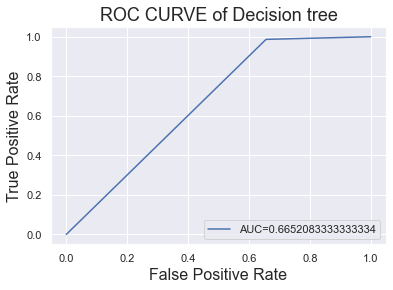

In [153]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc2))
plt.ylabel('True Positive Rate', size = 16)
plt.xlabel('False Positive Rate', size = 16)
plt.legend(loc=4)
plt.title('ROC CURVE of Decision tree', size = 18)
plt.show()

## Precision Recal curve

In [154]:
from sklearn.metrics import PrecisionRecallDisplay

In [155]:
# Average precision score
y_pred2 = dtree2.predict_proba(X_test)[:, 1]
average_precision2 = average_precision_score(y_test, y_pred2)
print(average_precision2)

0.7779071979012953


In [156]:
# Data to plot precision - recall curve
y_pred2 = dtree2.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred2)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recal2 = auc(recall, precision)
print(auc_precision_recal2)

0.8874799147401213


Text(0.5, 1.0, 'Decision Tree Precision-Recall curve: AP=0.80')

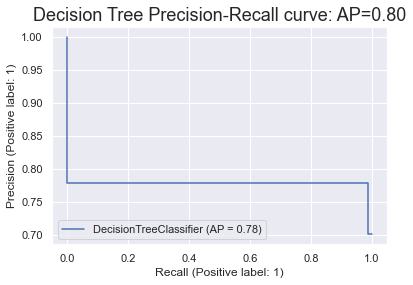

In [157]:
disp2 = PrecisionRecallDisplay.from_estimator(dtree2, X_test, y_test)
disp2.ax_.set_title('Decision Tree Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), size = 18)

In [158]:
X_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

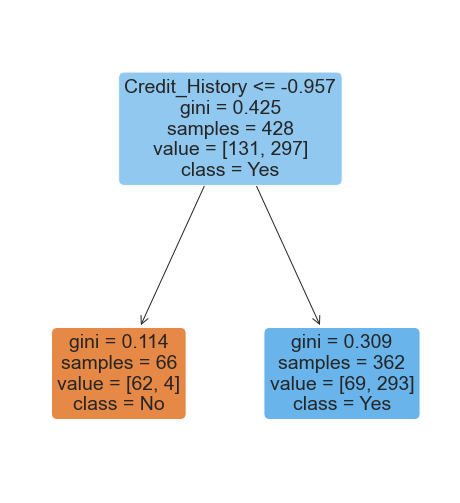

In [159]:
import graphviz
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 9))
plot_tree(dtree2,
         filled =True,
         rounded = True,
         class_names =["No", "Yes"],
         feature_names = X_names);

In [160]:
from sklearn.metrics import mean_squared_error
ts_error_gbr_2 = round(mean_squared_error(y_test,y_pred_test2),2)
print("Testing error is:",ts_error_gbr_2)

Testing error is: 0.21


# Feature importances of Decision Tree

In [161]:
importances = dtree2.feature_importances_

In [162]:
importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [163]:
feature_imp2 = pd.Series(dtree2.feature_importances_, index=X_names).sort_values(ascending=False)
feature_imp2

Credit_History       1.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Property_Area        0.0
dtype: float64

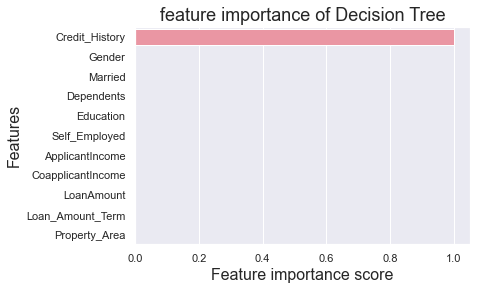

In [164]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=feature_imp2, y=feature_imp2.index)
ax.set_title("feature importance of Decision Tree", size = 18)
ax.set_yticklabels(feature_imp2.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

# random forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [166]:
num_trees = 500
rf = RandomForestClassifier(n_estimators = num_trees, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [167]:
acc = cross_val_score(rf, X_test, y_test, scoring = 'accuracy', cv = 5).mean()
acc

0.7575757575757576

In [168]:
cc =cross_val_score(rf, X_train, y_train, scoring = 'accuracy', cv = 5).mean()
cc

0.8224076607387142

In [169]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


## Hyperparameter tuning for random forest

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## With randomizedSearchCV

In [172]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 5,
                               verbose=2, random_state=0, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [173]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

## Model evaluation

In [252]:
tuned_model = RandomForestClassifier(n_estimators= 1200, min_samples_split= 10, min_samples_leaf =1,
                                   max_features= 'sqrt', max_depth =None, bootstrap=True)

In [253]:
tuned_model.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=1200)

In [254]:
acc_tuned = cross_val_score(tuned_model, X_test, y_test, scoring = 'accuracy', cv = 5).mean()
acc_tuned

0.7852813852813854

In [255]:
acc_tuned_train = cross_val_score(tuned_model, X_train, y_train, scoring = 'accuracy', cv = 5).mean()
acc_tuned_train

0.8201094391244871

## roc auc curve

In [178]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test3 = tuned_model.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test3 = tuned_model.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test3)
print("confusion Matrix is :",cm)

# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test3))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test3))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test3))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test3))

confusion Matrix is : [[11 21]
 [ 2 73]]
ROC-AUC score  test dataset:  t 0.64375
precision score  test dataset:  t 0.776595744680851
Recall score  test dataset:  t 0.9733333333333334
f1 score  test dataset :  t 0.8639053254437871


## Confusion Matrix

[[11 21]
 [ 2 73]]


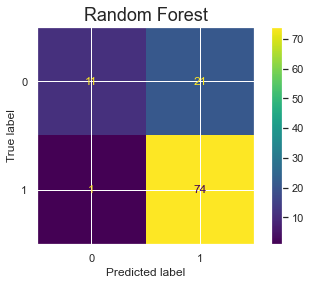

In [179]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test3))
con_ma3 = confusion_matrix(y_test, y_pred_test3, labels = tuned_model.classes_)
disp3 = ConfusionMatrixDisplay( confusion_matrix = con_ma3,
                              display_labels = ["Not Aproved", "Aproved"])
disp.plot()
plt.title('Random Forest', size = 18)
plt.show()
sns.set()

In [180]:
y_pred3 = tuned_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred3)
auc3 =metrics.roc_auc_score(y_test, y_pred3)

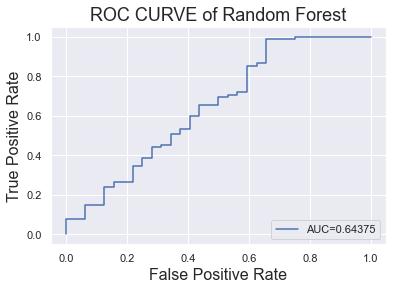

In [181]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc3))
plt.ylabel('True Positive Rate', size = 16)
plt.xlabel('False Positive Rate',size = 16)
plt.legend(loc=4)
plt.title('ROC CURVE of Random Forest', size = 18)
plt.show()

## Precision Recall Curve

In [182]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc, plot_precision_recall_curve

In [183]:
y_pred3 = tuned_model.predict_proba(X_test)[:, 1]

In [184]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred3)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall3 = auc(recall, precision)
print(auc_precision_recall3)

0.7885231060880075


Text(0.5, 1.0, 'Random Forest Precision-Recall curve: AP=0.80')

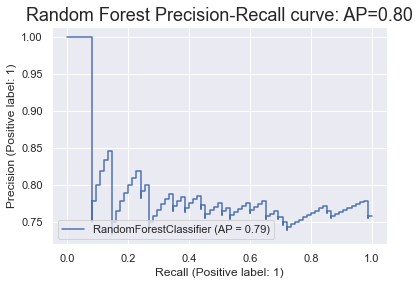

In [185]:
disp3 = PrecisionRecallDisplay.from_estimator(tuned_model, X_test, y_test)
disp3.ax_.set_title('Random Forest Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), size = 18)

# Feature importance of random Forest

In [186]:
tuned_model.feature_importances_

array([0.01572004, 0.02338318, 0.02350929, 0.01748972, 0.01573175,
       0.14364066, 0.0867418 , 0.13942558, 0.05911217, 0.43473772,
       0.04050808])

<BarContainer object of 11 artists>

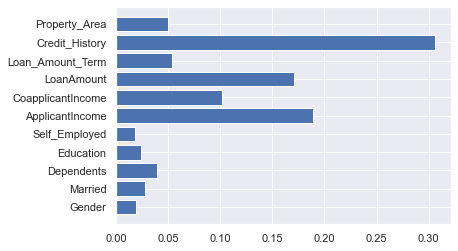

In [187]:
plt.barh(X_names, rf.feature_importances_)


## Other method to visualized importances

In [188]:
feature_imp3 = pd.Series(tuned_model.feature_importances_, index=X_names).sort_values(ascending=False)
feature_imp3

Credit_History       0.434738
ApplicantIncome      0.143641
LoanAmount           0.139426
CoapplicantIncome    0.086742
Loan_Amount_Term     0.059112
Property_Area        0.040508
Dependents           0.023509
Married              0.023383
Education            0.017490
Self_Employed        0.015732
Gender               0.015720
dtype: float64

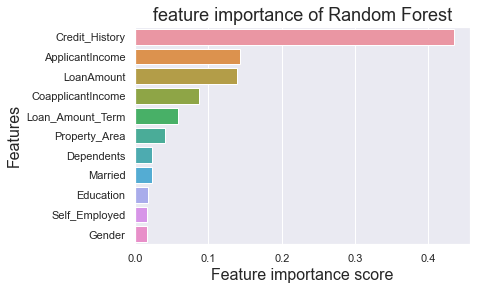

In [189]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=feature_imp3, y=feature_imp3.index)
ax.set_title("feature importance of Random Forest", size = 18)
ax.set_yticklabels(feature_imp3.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

## IMPORTANCES FROM PCA LOADINGS

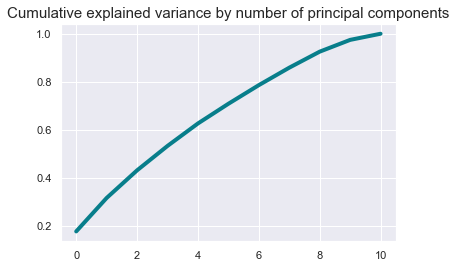

In [190]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xtrain)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=4, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=15)
plt.show()

In [191]:
from sklearn.metrics import mean_squared_error
ts_error_gbr_3 = round(mean_squared_error(y_test,y_pred_test3),2)
print("Testing error is:",ts_error_gbr_3)

Testing error is: 0.21


## Bernoulli Bayes

In [192]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB 

In [193]:
nbern = BernoulliNB()

In [194]:
nbern = nbern.fit(X_train, y_train)

In [195]:
nbern_accuracy = cross_val_score(nbern, X_test,y_test, scoring='accuracy', cv = 5).mean()
nbern_accuracy

0.7852813852813852

In [196]:
train_accuracy = cross_val_score(nbern, X_train,y_train, scoring='accuracy', cv = 5).mean()
train_accuracy

0.8294117647058824

## Hyperparameter of Bernoulli bayes

In [197]:
nbern.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [198]:
nbern.get_params().keys()

dict_keys(['alpha', 'binarize', 'class_prior', 'fit_prior'])

In [199]:
param_grid_nb = {
    'alpha': [0.001, 0.01, 0.1, 0.0001, 0.0000001],
    'binarize': [0.000001, 0.001, 0.01, 1, 10],
    
}

In [200]:
nbModel_grid = GridSearchCV(estimator=BernoulliNB(),
                            param_grid=param_grid_nb, cv=5, refit = True)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

BernoulliNB(alpha=0.001, binarize=1e-06)


In [201]:
nbb = BernoulliNB(alpha =0.001, binarize =0.000001)
nbb

BernoulliNB(alpha=0.001, binarize=1e-06)

In [202]:
train_acc1 = cross_val_score(nbModel_grid, X_train,y_train, scoring='accuracy', cv = 5).mean()
train_acc1

0.8294117647058824

In [203]:
test_acc1 = cross_val_score(nbb, X_test,y_test, scoring='accuracy', cv = 5).mean()
test_acc1

0.7857142857142858

In [204]:
nbern_y = nbModel_grid.predict(X_test)
y_pred4= nbModel_grid.predict_proba(X_test)[:, 1]

In [205]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred4)
auc4 = metrics.roc_auc_score(y_test, y_pred4)

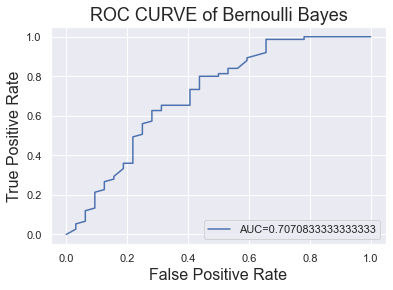

In [206]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc4))
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size =16)
plt.legend(loc=4)
plt.title('ROC CURVE of Bernoulli Bayes', size = 18)
plt.show()

In [207]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc, plot_precision_recall_curve

In [208]:
# Average precision score
from sklearn.metrics import PrecisionRecallDisplay
y_pred4 = nbModel_grid.predict_proba(X_test)[:, 1]
average_precision4 = average_precision_score(y_test, y_pred4)
print(average_precision4)

0.8029576142576187


In [209]:
# Data to plot precision - recall curve
y_pred4= nbModel_grid.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred4)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall4 = auc(recall, precision)
print(auc_precision_recall4)

0.8031619795522746


Text(0.5, 1.0, 'Bernoulli NB Precision-Recall curve: AP=0.80')

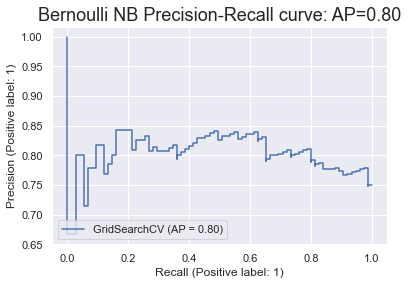

In [210]:
disp4 = PrecisionRecallDisplay.from_estimator(nbModel_grid, X_test, y_test)
disp4.ax_.set_title('Bernoulli NB Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision), size = 18)

In [211]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("Bernouilli Naive Bayes :")
print(" accuracy is ",accuracy_score(y_test,nbern_y))
print(" precision score is ",precision_score(y_test,nbern_y))
print(" recall is ",recall_score(y_test,nbern_y))
print(" f1 score is ",f1_score(y_test,nbern_y))                            
print(" classification report is ",classification_report(y_test,nbern_y))

Bernouilli Naive Bayes :
 accuracy is  0.794392523364486
 precision score is  0.7789473684210526
 recall is  0.9866666666666667
 f1 score is  0.8705882352941177
 classification report is                precision    recall  f1-score   support

           0       0.92      0.34      0.50        32
           1       0.78      0.99      0.87        75

    accuracy                           0.79       107
   macro avg       0.85      0.67      0.69       107
weighted avg       0.82      0.79      0.76       107



## Confusion Matrix


[[11 21]
 [ 1 74]]


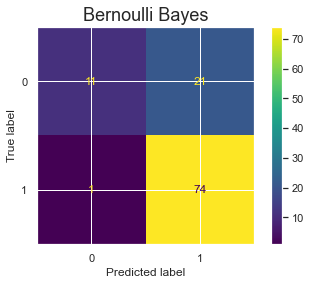

In [212]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, nbern_y))
con_ma4 = confusion_matrix(y_test, nbern_y, labels = nbModel_grid.classes_)
disp4 = ConfusionMatrixDisplay( confusion_matrix = con_ma4,
                              display_labels = ["Not Aproved", "Aproved"])
disp.plot()
plt.title('Bernoulli Bayes', size = 18)
plt.show()
sns.set()

# Permutation importances of Bernoulli Bayes

In [213]:
from sklearn.inspection import permutation_importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.20561
Feature: 10, Score: 0.00000


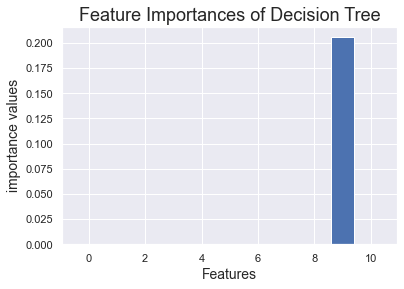

In [214]:
# perform permutation importance
results1 = permutation_importance(nbModel_grid, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance1 = results1.importances_mean
# summarize feature importance
for i,v in enumerate(importance1):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance1))], importance1)
plt.ylabel('importance values', size = 14)
plt.xlabel('Features', size = 14)
plt.title('Feature Importances of Decision Tree', size= 18)
plt.show()
sns.set()

In [215]:
feature_imp4 = pd.Series(importance1, index=X_names).sort_values(ascending=False)
feature_imp4

Credit_History       0.205607
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Property_Area        0.000000
dtype: float64

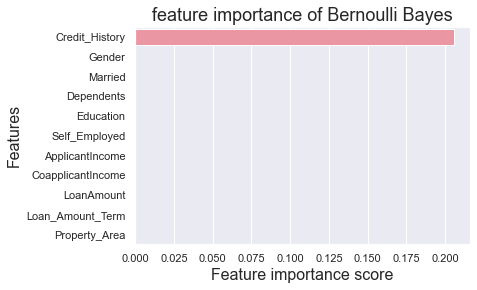

In [216]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=feature_imp4, y=feature_imp4.index)
ax.set_title("feature importance of Bernoulli Bayes", size = 18)
ax.set_yticklabels(feature_imp4.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

## Support vector Machine

In [217]:
#let's import the libraries
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [218]:
param_grid ={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10, 100]}

In [219]:
svm_rbf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose = 1)
svm_rbf.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 10, 100]},
             verbose=1)

In [220]:
#best parameters
svm_rbf.best_params_

{'C': 1, 'gamma': 0.01}

## rbf SVM with SVC(C=1, gamma=0.01)

In [221]:
svm = SVC(kernel ='rbf', C=1, gamma =0.01, probability = True).fit(X_train,y_train)
train_acc_rbf = cross_val_score(svm, X_train, y_train, scoring ='accuracy', cv = 5).mean()

In [222]:
#Accuracy train dataset
print("train accuracy :",train_acc_rbf)
#Accuracy on test dataset
test_acc_rbf = cross_val_score(svm, X_test, y_test, scoring ='accuracy', cv = 5).mean()
print("test accuracy :",test_acc_rbf)

train accuracy : 0.8294117647058824
test accuracy : 0.7948051948051948


In [223]:
rbf = svm.predict(X_test)
svm.probability = True
y_pred5 = svm.predict_proba(X_test)[:, 1]

In [224]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred5)
auc5 = metrics.roc_auc_score(y_test, y_pred5)

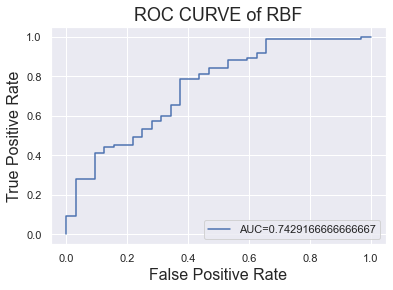

In [225]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc5))
plt.ylabel('True Positive Rate', size = 16)
plt.xlabel('False Positive Rate', size =16)
plt.legend(loc=4)
plt.title('ROC CURVE of RBF', size=18)
plt.show()

## average precision score

In [226]:
# Average precision score
from sklearn.metrics import PrecisionRecallDisplay
y_pred5 = svm.predict_proba(X_test)[:, 1]
average_precision5 = average_precision_score(y_test, y_pred5)
print(average_precision5)

0.8628936261829625


In [227]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred5)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall5 = auc(recall, precision)
print(auc_precision_recall5)

0.8612432243216896


Text(0.5, 1.0, 'RBF SVM Precision-Recall curve: AP=0.86')

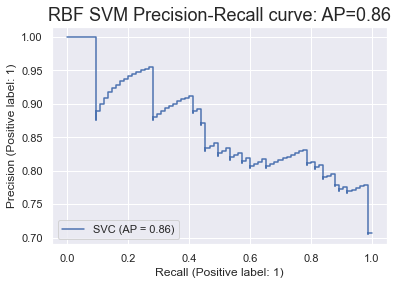

In [228]:
disp5 = PrecisionRecallDisplay.from_estimator(svm, X_test, y_test)
disp5.ax_.set_title('RBF SVM Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision5), size =18)


In [229]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report,confusion_matrix 
print("RBF SVM :")
print(" accuracy is ",accuracy_score(y_test,rbf))
print(" precision score is ",precision_score(y_test, rbf))
print(" recall is ",recall_score(y_test,rbf))
print(" f1 score is ",f1_score(y_test,rbf))                            
print(" classification report is ",classification_report(y_test,rbf))

RBF SVM :
 accuracy is  0.794392523364486
 precision score is  0.7789473684210526
 recall is  0.9866666666666667
 f1 score is  0.8705882352941177
 classification report is                precision    recall  f1-score   support

           0       0.92      0.34      0.50        32
           1       0.78      0.99      0.87        75

    accuracy                           0.79       107
   macro avg       0.85      0.67      0.69       107
weighted avg       0.82      0.79      0.76       107



## Confusion Matrix

[[11 21]
 [ 1 74]]


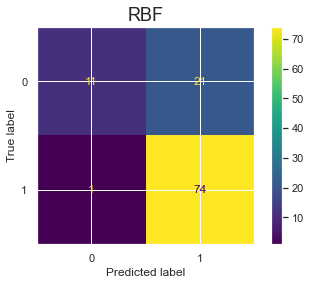

In [230]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, rbf))
con_ma5 = confusion_matrix(y_test, rbf, labels = svm.classes_)
disp5 = ConfusionMatrixDisplay( confusion_matrix = con_ma5)
disp.plot()
plt.title('RBF', size = 18)
plt.show()

In [231]:
from sklearn.inspection import permutation_importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.20000
Feature: 10, Score: 0.00000


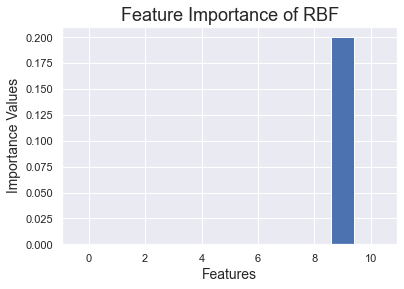

In [232]:
# perform permutation importance
results5 = permutation_importance(svm, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance5 = results5.importances_mean
# summarize feature importance
for i,v in enumerate(importance5):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance5))], importance5)
plt.xlabel('Features', size = 14)
plt.ylabel('Importance Values', size = 14)
plt.title('Feature Importance of RBF', size = 18)
plt.show()
sns.set()

In [233]:
feature_imp5 = pd.Series(importance5, index=X_names).sort_values(ascending=False)
feature_imp5

Credit_History       0.2
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Property_Area        0.0
dtype: float64

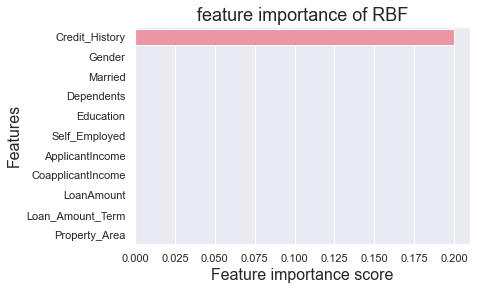

In [234]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=feature_imp5, y=feature_imp5.index)
ax.set_title("feature importance of RBF", size = 18)
ax.set_yticklabels(feature_imp5.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

# SVM

In [235]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [236]:
lsvc = SVC(random_state = 0, max_iter = 5000, probability = True)

In [237]:
lsvc.fit(X_train, y_train)
test_acc_lsvc = cross_val_score(lsvc, X_test, y_test, scoring ='accuracy', cv = 5).mean()
test_acc_lsvc

0.7948051948051948

In [238]:
train_acc_lsvc = cross_val_score(lsvc, X_train, y_train, scoring ='accuracy', cv = 5).mean()
train_acc_lsvc

0.8247606019151847

In [239]:
pred_svm = lsvc.predict(X_test)
lsvc.probability = True
y_pred6 = lsvc.predict_proba(X_test)[:, 1]

In [240]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred6)
auc6 =metrics.roc_auc_score(y_test, y_pred6)

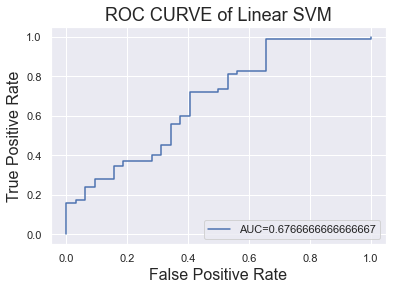

In [241]:
#create ROC curve
plt.plot(fpr,tpr, label ="AUC="+str(auc6))
plt.ylabel('True Positive Rate', size = 16)
plt.xlabel('False Positive Rate', size =16)
plt.legend(loc=4)
plt.title('ROC CURVE of Linear SVM', size=18)
plt.show()

## average precision score

In [242]:
# Average precision score
from sklearn.metrics import PrecisionRecallDisplay
y_pred6 = lsvc.predict_proba(X_test)[:, 1]
average_precision6 = average_precision_score(y_test, y_pred6)
print(average_precision6)

0.8285344492018749


In [243]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred6)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall6 = auc(recall, precision)
print(auc_precision_recall6)

0.8267234831447976


Text(0.5, 1.0, 'Linear SVM Precision-Recall curve: AP=0.86')

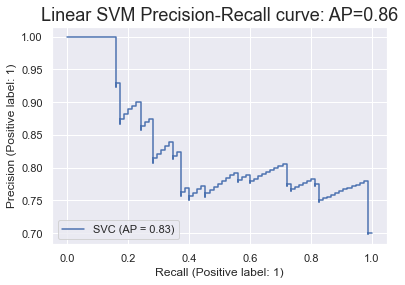

In [244]:
disp6 = PrecisionRecallDisplay.from_estimator(lsvc, X_test, y_test)
disp6.ax_.set_title('Linear SVM Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision5), size =18)

### Feature importance

In [245]:
from sklearn.inspection import permutation_importance

Feature: 0, Score: 0.00467
Feature: 1, Score: 0.00935
Feature: 2, Score: 0.00187
Feature: 3, Score: 0.00280
Feature: 4, Score: 0.00327
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00467
Feature: 7, Score: 0.00280
Feature: 8, Score: 0.01215
Feature: 9, Score: 0.19766
Feature: 10, Score: 0.00187


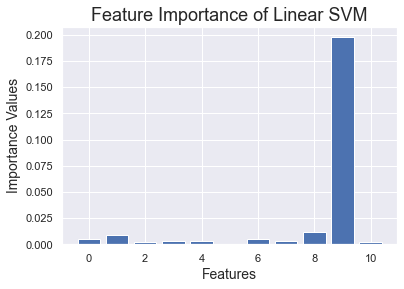

In [246]:
# perform permutation importance
results6 = permutation_importance(lsvc, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance6 = results6.importances_mean
# summarize feature importance
for i,v in enumerate(importance6):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance6))], importance6)
plt.xlabel('Features', size = 14)
plt.ylabel('Importance Values', size = 14)
plt.title('Feature Importance of Linear SVM', size = 18)
plt.show()
sns.set()

In [247]:
feature_imp6 = pd.Series(importance6, index=X_names).sort_values(ascending=False)
feature_imp6

Credit_History       0.197664
Loan_Amount_Term     0.012150
Married              0.009346
Gender               0.004673
CoapplicantIncome    0.004673
Self_Employed        0.003271
Education            0.002804
LoanAmount           0.002804
Dependents           0.001869
Property_Area        0.001869
ApplicantIncome      0.000000
dtype: float64

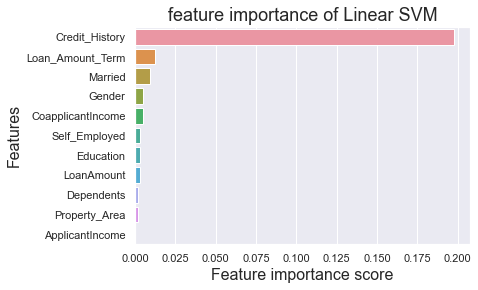

In [248]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=feature_imp6, y=feature_imp6.index)
ax.set_title("feature importance of Linear SVM", size = 18)
ax.set_yticklabels(feature_imp6.index)
ax.set_xlabel("Feature importance score", size = 16)
ax.set_ylabel("Features", size = 16)
plt.show()

In [249]:
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred6))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,pred_svm))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,pred_svm))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,pred_svm))


ROC-AUC score  test dataset:  t 0.6766666666666667
precision score  test dataset:  t 0.776595744680851
Recall score  test dataset:  t 0.9733333333333334
f1 score  test dataset :  t 0.8639053254437871


## Result

In [265]:
dtree2_train_accuracy = cross_val_score(dtree2,X_train,y_train, scoring ='accuracy', cv =5).mean()
dtree2_train_accuracy

0.8294117647058824

In [266]:
final_result = [['Decision Tree', dtree2_test_accuracy,dtree2_train_accuracy, auc2,average_precision2,
                precision_score(y_test,y_pred_test2),recall_score(y_test,y_pred_test2),f1_score(y_test,y_pred_test2)],
         ['Random Forest', acc_tuned, acc_tuned_train, auc3,auc_precision_recall3,
         precision_score(y_test,y_pred_test3),recall_score(y_test,y_pred_test3),f1_score(y_test,y_pred_test3)],
         ['Logistic Regression',acc1, acc2, auc1,average_precision, precision_score(y_test,y_pred_test),
         recall_score(y_test,y_pred_test), f1_score(y_test,y_pred_test)],
               ['RBF', test_acc_rbf, train_acc_rbf, auc5,auc_precision_recall5 , precision_score(y_test, rbf), recall_score(y_test,rbf),
               f1_score(y_test,rbf)],
               ['Bernoulli Bayes', test_acc1, train_acc1, auc4,auc_precision_recall4,precision_score(y_test,nbern_y),
               recall_score(y_test,nbern_y), f1_score(y_test,nbern_y)],
               ['Linear SVM',test_acc_lsvc, train_acc_lsvc, auc6, average_precision6,
               precision_score(y_test,pred_svm), recall_score(y_test,pred_svm),f1_score(y_test,pred_svm) ]]

In [268]:
final_df = pd.DataFrame(final_result, 
                        columns =['Models', 'Test Accuracies', 'Train accuracy', 'ROC-AUC score','Avg Precision-Recall',
                                               'Precision', 'Recall', 'F1 score'])

In [269]:
final_df

Models  Test Accuracies  Train accuracy  ROC-AUC score  \
0        Decision Tree         0.811818        0.829412       0.665208   
1        Random Forest         0.785281        0.820109       0.643750   
2  Logistic Regression         0.785281        0.829412       0.668333   
3                  RBF         0.794805        0.829412       0.742917   
4      Bernoulli Bayes         0.785714        0.829412       0.707083   
5           Linear SVM         0.794805        0.824761       0.676667   

   Avg Precision-Recall  Precision    Recall  F1 score  
0              0.777907   0.778947  0.986667  0.870588  
1              0.788523   0.776596  0.973333  0.863905  
2              0.795353   0.778947  0.986667  0.870588  
3              0.861243   0.778947  0.986667  0.870588  
4              0.803162   0.778947  0.986667  0.870588  
5              0.828534   0.776596  0.973333  0.863905

In [270]:
Model_comp = final_df[['Models','Test Accuracies', 'ROC-AUC score', 'Avg Precision-Recall']]

In [320]:
final_df.to_csv('final_data.csv')

In [271]:
Model_comp.head()

Models  Test Accuracies  ROC-AUC score  Avg Precision-Recall
0        Decision Tree         0.811818       0.665208              0.777907
1        Random Forest         0.785281       0.643750              0.788523
2  Logistic Regression         0.785281       0.668333              0.795353
3                  RBF         0.794805       0.742917              0.861243
4      Bernoulli Bayes         0.785714       0.707083              0.803162

In [272]:
Model_comp = Model_comp.sort_values(by=['ROC-AUC score'])
Model_comp

Models  Test Accuracies  ROC-AUC score  Avg Precision-Recall
1        Random Forest         0.785281       0.643750              0.788523
0        Decision Tree         0.811818       0.665208              0.777907
2  Logistic Regression         0.785281       0.668333              0.795353
5           Linear SVM         0.794805       0.676667              0.828534
4      Bernoulli Bayes         0.785714       0.707083              0.803162
3                  RBF         0.794805       0.742917              0.861243

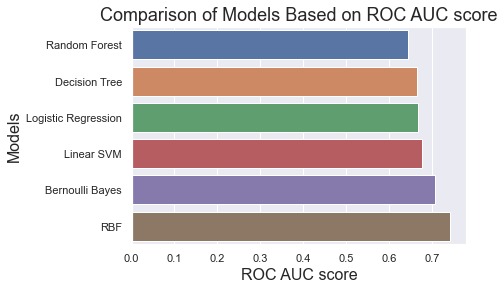

In [273]:
f, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=Model_comp['ROC-AUC score'], y=Model_comp['Models'])
ax.set_title("Comparison of Models Based on ROC AUC score", size = 18)
ax.set_yticklabels(Model_comp['Models'])
ax.set_xlabel("ROC AUC score", size = 16)
ax.set_ylabel("Models", size = 16)
plt.show()